# **Algorithm and Data Mining for Data Science Homework 2**



## **#2 Homework: Instagram Profiles & Posts**

## **[RQ1] Data Analysis (EDA)**

In [1]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

In [2]:
posts = pd.read_csv('../Datasets/instagram_posts.csv', sep="\t",  iterator=True, chunksize = 1000)

In [3]:
locations = pd.read_csv('../Datasets/instagram_locations.csv', sep='\t')
profiles = pd.read_csv('../Datasets/instagram_profiles.csv', sep='\t')

In [4]:
posts_chunk = posts.get_chunk(1000)

In [5]:
posts_chunk.head()

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
0,28370919,3496776,BXdjjUlgcgq,2237947779,1022366247837915,2017-08-06 20:06:57.000,2,Wreckloose! Deevalley bike park laps on the @i...,80,0
1,28370932,-1,BVg0pbolYBC,5579335020,457426771112991,2017-06-19 09:31:16.000,1,🙌🏼 believe in ya dreams 🙌🏼 just like I believe...,25,1
2,28370933,-1,BRgkjcXFp3Q,313429634,457426771112991,2017-03-11 20:05:03.000,1,#meraviglia #incensi #the #candele #profumo #a...,9,0
3,28370934,-1,BKTKeNhjEA7,1837592700,457426771112991,2016-09-13 16:27:16.000,1,#teatime #scorpion #friends #love #mountains #...,4,0
4,28370935,-1,8-NQrvoYLX,1131527143,457426771112991,2015-10-18 10:19:27.000,1,thE sky gavE mE a #constEllation,8,0


In [6]:
posts_chunk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sid              1000 non-null   int64 
 1   sid_profile      1000 non-null   int64 
 2   post_id          1000 non-null   object
 3   profile_id       1000 non-null   int64 
 4   location_id      1000 non-null   int64 
 5   cts              1000 non-null   object
 6   post_type        1000 non-null   int64 
 7   description      921 non-null    object
 8   numbr_likes      1000 non-null   int64 
 9   number_comments  1000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 78.2+ KB


In [7]:
locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022658 entries, 0 to 1022657
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   sid                     1022658 non-null  int64  
 1   id                      1022658 non-null  int64  
 2   name                    1022658 non-null  object 
 3   street                  715704 non-null   object 
 4   zip                     715579 non-null   object 
 5   city                    937166 non-null   object 
 6   region                  1760 non-null     object 
 7   cd                      939010 non-null   object 
 8   phone                   601688 non-null   object 
 9   aj_exact_city_match     1000510 non-null  object 
 10  aj_exact_country_match  1000510 non-null  object 
 11  blurb                   406705 non-null   object 
 12  dir_city_id             495698 non-null   object 
 13  dir_city_name           495698 non-null   object 
 14  di

In [8]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4509586 entries, 0 to 4509585
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   sid                  int64  
 1   profile_id           float64
 2   profile_name         object 
 3   firstname_lastname   object 
 4   description          object 
 5   following            float64
 6   followers            float64
 7   n_posts              float64
 8   url                  object 
 9   cts                  object 
 10  is_business_account  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 378.5+ MB


In [9]:
num_post_ids, num_loc_cities, num_profiles_names = posts_chunk['post_id'].nunique(), locations['city'].nunique(), profiles['profile_name'].nunique()

print("Unique post IDs: {}".format(num_post_ids))
print("Unique location cities: {}".format(num_loc_cities))
print("Unique profile names: {}".format(num_profiles_names))

Unique post IDs: 1000
Unique location cities: 118541
Unique profile names: 4508180


## **[RQ2] Simple Insights**

In [10]:
# Plot the number of posts for each profile in descending order
profiles.groupby(["profile_id"], dropna=True)['n_posts'].sum()
profiles.sort_values(by='n_posts', ascending = False)

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
3990313,3661552,1.996648e+08,jasem33312,jasem33312,NaN,2.0,82049.0,183730.0,NaN,2019-06-30 19:14:19.780 -0400,False
2571453,3288809,8.563367e+09,koenigpic,Helperwait Studio,Веб сайты от идеи до запуска,4538.0,675.0,142428.0,vk.com/ru.helperwait,2019-05-07 00:14:06.799 -0400,True
4338921,3970193,1.273455e+09,rudyanto62,Rudyanto 王耀祝,NaN,164.0,1693.0,126340.0,NaN,2019-07-15 10:00:51.171 -0400,False
3942129,3621669,9.813508e+06,hometown_ni,AngelsCowboysLakers,All about live & let live. Peace & Harmony. La...,7488.0,1755.0,125220.0,NaN,2019-06-27 02:49:38.140 -0400,False
4219642,3851869,1.607309e+09,dwfitfiber_thailand,เห็นผลตั้งแต่เซ็ตแรกท้าลอง,✿รับตัวแทนรายได้ดีมาก\n🏧 KTB l SCB l KBANK | B...,7490.0,44951.0,117262.0,bit.ly/2GdIYJl,2019-07-13 02:10:07.317 -0400,True
...,...,...,...,...,...,...,...,...,...,...,...
4509575,4184448,2.438073e+08,not_omeed,أوميد,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:39:06.271 -0400,NaN
4509577,4184452,6.567796e+08,shak._n5,Shakil Hussain,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:39:23.911 -0400,NaN
4509582,4184469,1.340704e+07,jornvlaeminck,Jorn Vlaeminck,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:41.628 -0400,NaN
4509583,4184470,6.007354e+09,s_degol,Sanne Degol,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:42.983 -0400,NaN


In [11]:
# What posts have the highest number of "likes"?
posts_numbr_likes = pd.read_csv('../Datasets/instagram_posts.csv', sep="\t",  usecols=['numbr_likes'])

In [12]:
posts_numbr_likes.sort_values(by='numbr_likes', ascending=False).head(10)

,numbr_likes
19624085,8822952.0
19623988,5447066.0
19624082,5116398.0
19623986,4271466.0
39701024,4264745.0
6293907,3586546.0
19624086,3558599.0
19802016,3533326.0
30850564,3340297.0
39812576,3311246.0


In [13]:
# What posts have the most and the least number of comments?
posts_number_comments = pd.read_csv('../Datasets/instagram_posts.csv', sep="\t",  usecols=['number_comments'])

In [14]:
most_comments = posts_number_comments.sort_values(by='number_comments', ascending=False).head(10)
least_comments = posts_number_comments.sort_values(by=['number_comments'], ascending=True).head(10)
pd.concat([most_comments,least_comments], axis = 0)

,number_comments
41873060,488953.0
12164781,313997.0
33261751,257488.0
11149127,214365.0
9383817,189888.0
5427268,180635.0
25257169,173988.0
6220011,170836.0
31689573,166919.0
14257307,166198.0


In [15]:
# How many posts include tagged locations, and how many do not? Show it using an appropriate chart and comment your results.
posts_location = pd.read_csv('../Datasets/instagram_posts.csv', sep="\t",  usecols=['location_id'])

In [16]:
no_location = posts_location['location_id'].isna().sum()
tagged_location = posts_location['location_id'].count()

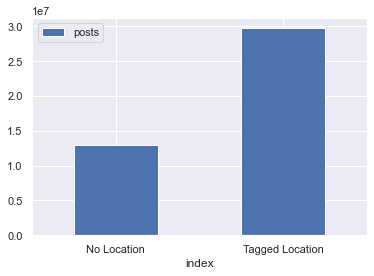

In [17]:
df = pd.DataFrame({'posts': [no_location, tagged_location],
                  'index': ['No Location', 'Tagged Location']})

plot = df.plot.bar(x='index', y='posts', rot=0)

In [18]:
# How many posts include only photos? How many also have videos?
posts_post_type = pd.read_csv('../Datasets/instagram_posts.csv', sep="\t",  usecols=['post_type'])

In [19]:
only_photos = posts_post_type.loc[posts_post_type['post_type'] == 1, 'post_type'].sum()
video_multi = posts_post_type.loc[posts_post_type['post_type'] > 1, 'post_type'].sum()

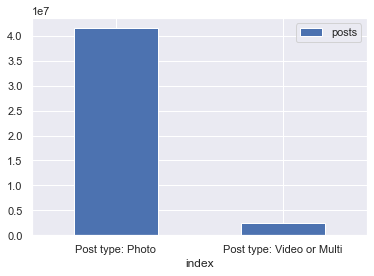

In [20]:
df = pd.DataFrame({'posts': [only_photos, video_multi],
                   'index': ['Post type: Photo', 'Post type: Video or Multi']})

plot = df.plot.bar(x='index', y='posts', rot=0)

In [21]:
# What's the percentage of business accounts vs non-business? What can you interpret regarding that percentage?
business, not_business = profiles['is_business_account'].value_counts()
not_business += profiles['is_business_account'].isnull().sum()
print("business account percentage: {}\nnot business account percentage: {}".format((business/profiles['is_business_account'].size) * 100 , (not_business/profiles['is_business_account'].size) * 100))

business account percentage: 57.43474012913824
not business account percentage: 42.56525987086176


## **[RQ3] Now it's important to understand the most common times in which users publish their posts**

In [22]:
# What is the most common time in which users publish their posts?
posts_cts = pd.read_csv('../Datasets/instagram_posts.csv', sep="\t",  usecols=['cts'])

In [23]:
profiles['times'] = pd.to_datetime(posts_cts['cts']).dt.strftime('%H:%M:%S')
cts = profiles.groupby(['times'])['times'].count().reset_index(name='number_posts_submitted').sort_values(['number_posts_submitted'], ascending=False)
cts

,times,number_posts_submitted
73747,20:29:07,119
70217,19:30:17,118
75606,21:00:06,112
72015,20:00:15,110
61215,17:00:15,110
...,...,...
23068,06:24:28,14
30328,08:25:28,14
27529,07:38:49,14
22352,06:12:32,12


In [24]:
# Create a function that receives a time intervals list as a parameter and returns a plot with the number of posts for each given interval.
def plot_posts_per_time(interval_list, data):

    data['times'] = pd.to_datetime(data['times'], format='%H:%M:%S').dt.time
    times = list(zip(data.times, data.number_posts_submitted))
    default_value = 0
    keys = []
    for initial_time, end_time in interval_list:
        keys.append(initial_time + '-' + end_time)
    posts_in_intervals = dict.fromkeys(keys,default_value)
    for initial_time, end_time in interval_list:
        for time, num_post in times:
            if pd.to_datetime(initial_time).time() <= time <= pd.to_datetime(end_time).time():
                posts_in_intervals[initial_time + '-' + end_time] += num_post

    fig, ax = plt.subplots()
    ax.barh(*zip(*posts_in_intervals.items()))
    plt.show()

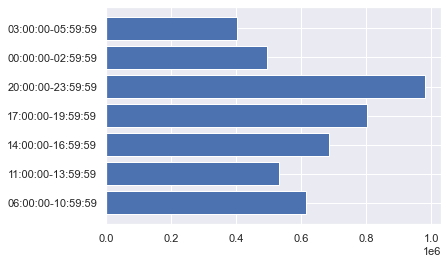

In [25]:
# Use the function that you created in the previous literal to plot the number of posts between the following time intervals:

interval_list = [('06:00:00', '10:59:59'),('11:00:00', '13:59:59'), ('14:00:00', '16:59:59'), ('17:00:00', '19:59:59'), ('20:00:00', '23:59:59'), ('00:00:00', '02:59:59'), ('03:00:00','05:59:59')]

plot_posts_per_time(interval_list, cts)

## **[RQ4] In most cases, we will not have a consistent dataset, and the one we are dealing with is not an exception (ex. in the given datasets, you may not find the information of the profiles for some of the posts). So let’s enhance our analysis.**

In [26]:
# Write a function that, given a profile_id, will be able to return the posts that belong to the given profile_id.
posts_for_r4 = pd.read_csv('../Datasets/instagram_posts.csv', sep="\t",  usecols=['profile_id', 'numbr_likes', 'number_comments','cts','location_id', 'post_type'])

In [27]:
def get_posts_by_profile_id(profile_id):
    return posts_for_r4.query("profile_id == {}".format(profile_id))

get_posts_by_profile_id(260162660)

,profile_id,location_id,cts,post_type,numbr_likes,number_comments
980,260162660.0,5.275038e+14,2018-03-11 14:48:58.000,1,18.0,0.0
981,260162660.0,5.275038e+14,2019-05-24 09:04:47.000,1,1.0,0.0
982,260162660.0,5.275038e+14,2019-05-18 20:30:53.000,1,11.0,0.0
983,260162660.0,5.275038e+14,2019-05-18 02:05:56.000,1,14.0,2.0
984,260162660.0,5.275038e+14,2019-05-16 14:41:08.000,1,4.0,0.0
985,260162660.0,5.275038e+14,2019-05-16 04:09:50.000,1,4.0,0.0
986,260162660.0,5.275038e+14,2019-05-15 13:54:26.000,2,31.0,1.0
987,260162660.0,5.275038e+14,2019-05-04 01:45:16.000,1,10.0,0.0
988,260162660.0,5.275038e+14,2019-04-30 05:56:05.000,2,0.0,0.0
989,260162660.0,5.275038e+14,2019-03-29 01:34:28.000,1,11.0,2.0


In [28]:
# Write another function that, given an input n (an integer), will return the posts that belong to the n top posted profiles (top n profiles that have posted the highest number of posts) that their data is available in the profile.csv using the previously written function.

def post_of_n_top_posted_profiles(n):
    profiles.groupby(["profile_id"], dropna=True)['n_posts'].sum()
    n_top_profiles = profiles.sort_values(by='n_posts', ascending = False).head(n)
    filter_list = n_top_profiles['profile_id']
    return posts_for_r4[posts_for_r4['profile_id'].isin(filter_list)]

In [29]:
# What is the average number of "likes" and comments of the top 10 profiles with the highest number of posts which their information is available in profile.csv?
posts_of_n_top_profiles = post_of_n_top_posted_profiles(10)
print("Average number of likes: {}\nAverage number of comments: {}".format(posts_of_n_top_profiles['numbr_likes'].mean(), posts_of_n_top_profiles['number_comments'].mean()))

Average number of likes: 3.1713483146067416
Average number of comments: 0.033707865168539325


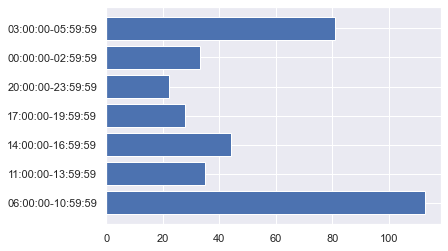

In [30]:
# Plot the number of posts that these top 10 profiles have sent on Instagram in the given interval in question RQ3. Interpret the resulting chart.
posts_of_n_top_profiles = post_of_n_top_posted_profiles(10)
import warnings
warnings.simplefilter('ignore',lineno=5)
posts_of_n_top_profiles['times'] = pd.to_datetime(posts_of_n_top_profiles['cts']).dt.strftime('%H:%M:%S')
posts_of_top_profiles = posts_of_n_top_profiles.groupby(['times'])['times'].count().reset_index(name='number_posts_submitted').sort_values(['number_posts_submitted'], ascending=False)

plot_posts_per_time(interval_list, posts_of_top_profiles)

## **[RQ5] The most influential users are the ones with the highest number of “followers", you can now look more into their activity.**

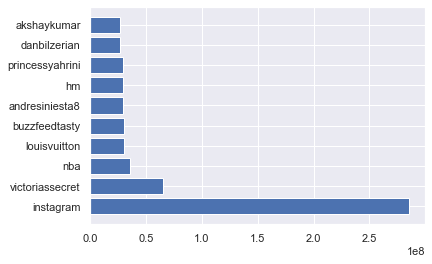

In [31]:
# Plot the top 10 most popular users in terms of followers and their number of posts.
top_ten_most_popular_profiles = profiles.sort_values(['followers'], ascending=False).head(10)
fig, ax = plt.subplots()
ax.barh(top_ten_most_popular_profiles['profile_name'], top_ten_most_popular_profiles['followers'])
plt.show()

In [32]:
# Who is the most influential user?
top_ten_most_popular_profiles.loc[top_ten_most_popular_profiles['followers'] == top_ten_most_popular_profiles['followers'].max()]

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account,times
2880218,336492,25025320.0,instagram,Instagram,Bringing you closer to the people and things y...,226.0,285457645.0,5760.0,help.instagram.com,NaN,False,00:05:49


In [33]:
def post_of_n_top_following_profiles(n):
    profiles.groupby(["profile_id"], dropna=True)['n_posts'].sum()
    n_top_profiles = profiles.sort_values(by='followers', ascending = False).head(n)
    filter_list = n_top_profiles['profile_id']
    return posts_for_r4[posts_for_r4['profile_id'].isin(filter_list)]

In [34]:
# Have they posted anything with tagged locations? Extract the most frequent areas on their posts and plot the number of times each city has been visited.
posts_of_n_top_profiles = post_of_n_top_following_profiles(10)
posts_of_top_profiles = posts_of_n_top_profiles[posts_of_n_top_profiles['profile_id'].isin(top_ten_most_popular_profiles['profile_id'])]
locations_count = posts_of_top_profiles.groupby(['location_id'])['location_id'].count().reset_index(name='location_count')
most_frequent_areas = locations.loc[locations['id'].isin(locations_count['location_id'])][['id','city']].rename(columns = {'id':'location_id'})
most_frequent_areas.dropna(inplace=True)

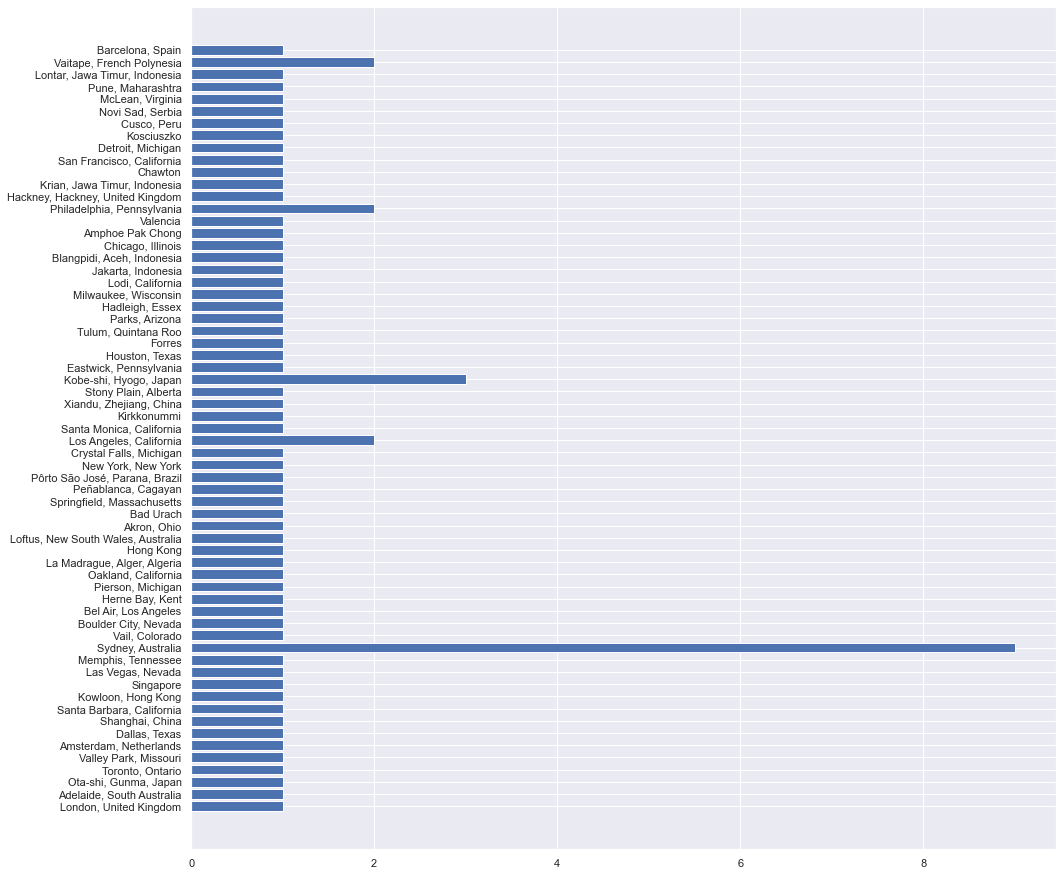

In [35]:
cities_counts = pd.merge(locations_count, most_frequent_areas, on="location_id").astype({'location_id': int, 'city': str, 'location_count': int})
fig, ax = plt.subplots()
fig.set_size_inches(15.5, 15.5)
ax.barh(cities_counts.city, cities_counts.location_count)
plt.show()

In [36]:
# How many pictures-only posts have they published? How many reels? (only videos) and how many with both contents? Provide the number as percentages and interpret those figures.
top_profile_only_photo_posts = posts_of_top_profiles[posts_of_top_profiles.post_type == 1]
top_profile_reels_posts = posts_of_top_profiles[posts_of_top_profiles.post_type == 2]
top_profile_multi_posts = posts_of_top_profiles[posts_of_top_profiles.post_type == 3]

print("Percentage of photo posts: {}%".format(round(len(top_profile_only_photo_posts.index)/len(posts_of_top_profiles.index),3)*100))
print("Percentage of reels posts: {}%".format(round(len(top_profile_reels_posts.index)/len(posts_of_top_profiles.index),3)*100))
print("Percentage of multi posts: {}%".format(round(len(top_profile_multi_posts.index)/len(posts_of_top_profiles.index),3)*100))

Percentage of photo posts: 90.8%
Percentage of reels posts: 9.2%
Percentage of multi posts: 0.0%


In [37]:
# How many "likes" and comments did posts with only pictures receive? How about videos and mixed posts? Try to provide the average numbers and confront them with their followers amount, explaining what you can say from that comparison.

likes_photos = int(np.average(top_profile_only_photo_posts.numbr_likes))
comments_photos = int(np.average(top_profile_only_photo_posts.number_comments))

likes_reels = int(np.average(top_profile_reels_posts.numbr_likes))
comments_reels = int(np.average(top_profile_reels_posts.number_comments))

likes_multi = int(np.average(top_profile_multi_posts.numbr_likes if top_profile_multi_posts.size != 0 else 0))
comments_multi = int(np.average(top_profile_multi_posts.number_comments if top_profile_multi_posts.size != 0 else 0))

profile_followers = int(np.average(top_ten_most_popular_profiles.followers))

print("average likes and comments of photos posts: {} / {}".format(likes_photos,comments_photos))
print("average likes and comments of reels posts: {} / {}".format(likes_reels,comments_reels))
print("average likes and comments of multi posts: {} / {}".format(likes_multi,comments_multi))
print("average number of followers: {}".format(profile_followers))

average likes and comments of photos posts: 541294 / 3882
average likes and comments of reels posts: 266524 / 2019
average likes and comments of multi posts: 0 / 0
average number of followers: 58749283


## **[RQ6] It's time to get information from the user posting effectiveness.**

In [38]:
# What is the average time (days and minutes) a user lets pass before publishing another post? Plot the top 3 users that publish posts more frequently (calculate the average time that passes between posts), including their amount of followers and following. Provide insights from that chart.
def time_intervals_between_posts():
    df = pd.DataFrame({'profile_id': posts_for_r4['profile_id'], 'cts': pd.to_datetime(posts_for_r4['cts']).dt.floor('T')})
    df = df.sort_values(by=["profile_id","cts"])
    df['cts_previous'] = df.groupby('profile_id')['cts'].shift()
    df['diff_from_previous'] = df['cts'] - df['cts_previous']
    df['diff_from_previous'] = df['diff_from_previous'].fillna(pd.Timedelta("0 days 00:00:00"))
    return df

In [39]:
df = time_intervals_between_posts()

In [40]:
df2 = pd.DataFrame({'profile_id': df['profile_id'], 'diff_from_previous': df['diff_from_previous']}).dropna()
df3 = df2.groupby('profile_id').mean(numeric_only = False)
three_most_frequent_uploading_user = df3[df3['diff_from_previous'] != pd.Timedelta("0 days 00:00:00")].sort_values('diff_from_previous').head(3)

In [41]:
three_most_frequent_uploading_user

,diff_from_previous
profile_id,
8.972807e+09,0 days 00:00:05
9.031308e+09,0 days 00:00:05
3.020706e+09,0 days 00:00:05


In [42]:
three_most_frequent_uploading_user = profiles[profiles['profile_id'].isin(three_most_frequent_uploading_user.index)]

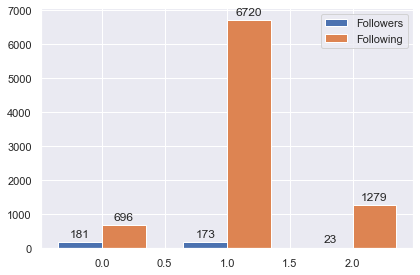

In [43]:
labels = three_most_frequent_uploading_user['profile_name']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, three_most_frequent_uploading_user['followers'], width, label='Followers')
rects2 = ax.bar(x + width/2, three_most_frequent_uploading_user['following'], width, label='Following')
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [44]:
# Using the function you previously coded, plot the time intervals with the highest average number of “likes” and the ones with the highest average number of comments on posts.
